# 公司培训 数据分析

## 一、题目分析

### 数据描述

您的客户是一家跨国金融公司，向消费者提供多种产品。尽管主要的贡献来自线下分销渠道，但是有多个渠道可以为消费者提供这些产品。离线渠道通过其代理商网络向消费者出售金融产品，并且根据政府规定，这些代理商必须获得销售金融产品的认证。针对不同类别的金融产品，有多种认证计划。

由于这个离线渠道对公司的总销售额贡献很大，因此公司着重于招聘并认证他们以建立大型代理商网络。在这里，主要的挑战是培训他们获得销售各种类型产品的认证。

在多个程序中，您将获得针对培训课程测试明智的学员绩效数据集。您的任务是根据人口统计信息和培训计划/测试详细信息来预测此类测试的性能。通过找出最重要的因素来提高受训者的参与度和表现，这将使您的客户加强其培训问题。



### 内容

- 变量-说明
- id_num-唯一ID
- program_id-程序的ID
- program_type-程序类型
- program_duration-计划持续时间（天）
- test_id-测试ID
- test_type-测试类型（离线/在线）
- 难度级别-测试难度级别
- trainee_id-学员的ID
- 性别-受训者性别
- 教育-学员的教育水平
- city_tier-实习生居住城市的等级
- 年龄-受训者年龄
- 总计划招收-总课程的学生通过实习
- is_handicapped-受训者是否患有残疾？
- 学员参与度-讲师/教学助理为课程提供学员参与度
- is_pass 0-测试失败，1-测试通过

## 二、代码实现

### 1、导入所需的 Python 模块和数据集

In [134]:
##  基础函数库
import math
import numpy as np 
import pandas as pd

## 绘图函数库
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

### 2、数据可视化，探索性分析数据

In [135]:
train_base = pd.read_csv('./data/train/train.csv')
test_base=pd.read_csv('./data/test/test1.csv')

In [136]:
predictors = ["program_id", "program_duration", "test_type", "difficulty_level", "gender", "age","education", "city_tier","total_programs_enrolled","is_handicapped","trainee_engagement_rating"] # 输入机器学习算法的特征

In [137]:
train_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49998 entries, 0 to 49997
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_num                     49998 non-null  object 
 1   program_type               49267 non-null  object 
 2   program_id                 49299 non-null  object 
 3   program_duration           49323 non-null  float64
 4   test_id                    49273 non-null  float64
 5   test_type                  49296 non-null  object 
 6   difficulty_level           49295 non-null  object 
 7   trainee_id                 49259 non-null  float64
 8   gender                     49291 non-null  object 
 9   education                  49296 non-null  object 
 10  city_tier                  49298 non-null  float64
 11  age                        30619 non-null  float64
 12  total_programs_enrolled    49306 non-null  float64
 13  is_handicapped             49280 non-null  obj

<AxesSubplot:>

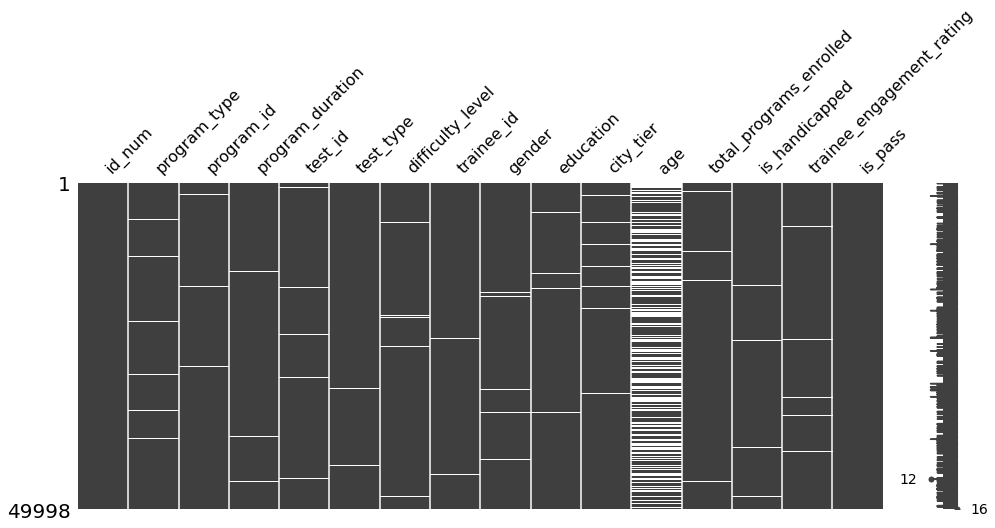

In [138]:
msno.matrix(train_base, figsize=(16, 6))

In [139]:
len(predictors)## 我们所用特征数量

11

对数据进行简单的查看

In [140]:
train_base.head(10)

,id_num,program_type,program_id,program_duration,test_id,test_type,difficulty_level,trainee_id,gender,education,city_tier,age,total_programs_enrolled,is_handicapped,trainee_engagement_rating,is_pass
0,9389_150,Y,Y_1,136.0,150.0,offline,intermediate,9389.0,M,Matriculation,3.0,24.0,5.0,N,1.0,0
1,16523_44,T,T_1,131.0,44.0,offline,easy,16523.0,F,High School Diploma,4.0,26.0,2.0,N,3.0,1
2,13987_178,Z,Z_2,120.0,178.0,online,easy,13987.0,M,Matriculation,1.0,40.0,1.0,N,2.0,1
3,13158_32,T,T_2,117.0,32.0,offline,easy,13158.0,F,Matriculation,3.0,NaN,4.0,N,1.0,1
4,10591_84,V,V_3,131.0,84.0,offline,intermediate,10591.0,F,High School Diploma,1.0,42.0,2.0,N,4.0,1
5,12531_23,T,T_3,134.0,23.0,offline,intermediate,12531.0,F,High School Diploma,1.0,29.0,4.0,N,2.0,0
6,17874_144,Y,Y_2,120.0,144.0,online,easy,17874.0,M,Bachelors,2.0,48.0,3.0,N,3.0,1
7,8129_61,U,U_1,134.0,NaN,online,easy,8129.0,M,Matriculation,2.0,45.0,1.0,N,1.0,1
8,5652_57,U,U_1,134.0,57.0,offline,easy,5652.0,M,Matriculation,4.0,NaN,3.0,N,3.0,1
9,17019_153,Y,Y_1,136.0,153.0,offline,hard,17019.0,M,Bachelors,3.0,28.0,2.0,N,4.0,1


In [141]:
train_base.program_id.value_counts() ##例子

Y_1    4566
Y_3    4471
T_3    4128
Y_4    3349
T_4    3241
U_1    3202
V_4    2907
Y_2    2847
T_2    2846
V_1    2310
V_3    2246
T_1    2124
U_2    2065
Z_3    1825
Z_2    1422
Z_1    1315
V_2    1291
X_1     945
X_3     799
X_2     519
S_2     446
S_1     435
Name: program_id, dtype: int64

In [142]:
train_base.gender.value_counts()

M    26276
F    23015
Name: gender, dtype: int64

In [143]:
train_base.is_pass.value_counts()
## 训练集通过率15185/34813==0.6962

1    34813
0    15185
Name: is_pass, dtype: int64

### 数据可视化

In [144]:
## 将数值的空白处填入众数
train_base = train_base.fillna(train_base.mean())##median中位数，也可以去尝试,把age补齐了

In [145]:
train_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49998 entries, 0 to 49997
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_num                     49998 non-null  object 
 1   program_type               49267 non-null  object 
 2   program_id                 49299 non-null  object 
 3   program_duration           49998 non-null  float64
 4   test_id                    49998 non-null  float64
 5   test_type                  49296 non-null  object 
 6   difficulty_level           49295 non-null  object 
 7   trainee_id                 49998 non-null  float64
 8   gender                     49291 non-null  object 
 9   education                  49296 non-null  object 
 10  city_tier                  49998 non-null  float64
 11  age                        49998 non-null  float64
 12  total_programs_enrolled    49998 non-null  float64
 13  is_handicapped             49280 non-null  obj

### 3、数据清洗与转化

观察发现：  


1、第0项特征“id_num”与第4项特征“test_id”和第7项特征“trainee_id ”基本一致，故将第4项特征“test_id”和第7项“trainee_id ”去除，不利用该数据。
  
2、第3项特征“program_id ”中包含第1项特征“program_type”，故讲第1项“program_type”去除，不利用该数据。  


In [146]:
##去除冗杂数据
train_base = train_base.drop('test_id',1)
train_base = train_base.drop('trainee_id',1)
train_base = train_base.drop('program_type',1)

test_base = test_base.drop('test_id',1)
test_base = test_base.drop('trainee_id',1)
test_base = test_base.drop('program_type',1)

test_base = test_base.drop('is_pass',1)#顺手把is_pass删了

In [149]:
## 由于我们训练集数据很大，可以把那些缺少object类型的删了
train_base = train_base.dropna(how='any')

In [150]:
train_base.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45906 entries, 0 to 49997
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_num                     45906 non-null  object 
 1   program_id                 45906 non-null  object 
 2   program_duration           45906 non-null  float64
 3   test_type                  45906 non-null  object 
 4   difficulty_level           45906 non-null  object 
 5   gender                     45906 non-null  object 
 6   education                  45906 non-null  object 
 7   city_tier                  45906 non-null  float64
 8   age                        45906 non-null  float64
 9   total_programs_enrolled    45906 non-null  float64
 10  is_handicapped             45906 non-null  object 
 11  trainee_engagement_rating  45906 non-null  float64
 12  is_pass                    45906 non-null  int64  
dtypes: float64(5), int64(1), object(7)
memory usag

### 将各个特征转为浮点型

In [151]:
# loc定位到目标行，对特征进行独热编码
train_base.loc[train_base['test_type'] == 'offline', 'test_type'] = 0 # test_type为offline 为0
train_base.loc[train_base['test_type'] == 'online', 'test_type'] = 1 # test_type为online  为1
train_base['test_type'] = train_base['test_type'].astype(float)

train_base.loc[train_base['difficulty_level'] == 'easy', 'difficulty_level'] = 1.0 # difficulty_level为easy 为1
train_base.loc[train_base['difficulty_level'] == 'intermediate', 'difficulty_level'] = 2.0 # difficulty_level为intermediate 为2
train_base.loc[train_base['difficulty_level'] == 'hard', 'difficulty_level'] = 3.0 # difficulty_level为hard为3
train_base.loc[train_base['difficulty_level'] == 'vary hard', 'difficulty_level'] = 4.0 # difficulty_level为vary hard 为1
train_base['difficulty_level'] = train_base['difficulty_level'].astype(float)

train_base.loc[train_base['education'] == 'No Qualification', 'education'] = 0
train_base.loc[train_base['education'] == 'Matriculation', 'education'] = 1 # education为Matriculation 为1
train_base.loc[train_base['education'] == 'High School Diploma', 'education'] = 2 # education为High School Diploma 为2
train_base.loc[train_base['education'] == 'Bachelors', 'education'] = 3 # education为Bachelors 为3
train_base.loc[train_base['education'] == 'Masters', 'education'] = 4
train_base['education'] = train_base['education'].astype(float)

train_base.loc[train_base['is_handicapped'] == 'N', 'is_handicapped'] = 0 # is_handicapped为N 为0
train_base.loc[train_base['is_handicapped'] == 'Y', 'is_handicapped'] = 1 # is_handicapped为Y 为1
train_base['is_handicapped'] = train_base['is_handicapped'].astype(float)

train_base.loc[train_base['gender'] == 'F', 'gender'] = 0 # gender为F 为0
train_base.loc[train_base['gender'] == 'M', 'gender'] = 1 # gender为M 为1
train_base['gender'] = train_base['gender'].astype(float)

train_base.loc[train_base['program_id'] == 'S_1', 'program_id'] = 5
train_base.loc[train_base['program_id'] == 'S_2', 'program_id'] = 10
train_base.loc[train_base['program_id'] == 'T_1', 'program_id'] = 12.5
train_base.loc[train_base['program_id'] == 'T_2', 'program_id'] = 15
train_base.loc[train_base['program_id'] == 'T_3', 'program_id'] = 17.5
train_base.loc[train_base['program_id'] == 'T_4', 'program_id'] = 20
train_base.loc[train_base['program_id'] == 'U_1', 'program_id'] = 25
train_base.loc[train_base['program_id'] == 'U_2', 'program_id'] = 30
train_base.loc[train_base['program_id'] == 'V_1', 'program_id'] = 32.5
train_base.loc[train_base['program_id'] == 'V_2', 'program_id'] = 35
train_base.loc[train_base['program_id'] == 'V_3', 'program_id'] = 37.5
train_base.loc[train_base['program_id'] == 'V_4', 'program_id'] = 40
train_base.loc[train_base['program_id'] == 'X_1', 'program_id'] = 43.3
train_base.loc[train_base['program_id'] == 'X_2', 'program_id'] = 46.6
train_base.loc[train_base['program_id'] == 'X_3', 'program_id'] = 50
train_base.loc[train_base['program_id'] == 'Y_1', 'program_id'] = 52.5
train_base.loc[train_base['program_id'] == 'Y_2', 'program_id'] = 55
train_base.loc[train_base['program_id'] == 'Y_3', 'program_id'] = 57.5
train_base.loc[train_base['program_id'] == 'Y_4', 'program_id'] = 60
train_base.loc[train_base['program_id'] == 'Z_1', 'program_id'] = 63.3
train_base.loc[train_base['program_id'] == 'Z_2', 'program_id'] = 66.6
train_base.loc[train_base['program_id'] == 'Z_3', 'program_id'] = 70
train_base['program_id'] = train_base['program_id'].astype(float)
#['Y_1' 'T_1' 'Z_2' 'T_2' 'V_3' 'T_3' 'Y_2' 'U_1' 'Y_3' 'X_3' 'Y_4' 'V_1'
#'T_4' 'Z_1' 'S_2' 'X_2' 'V_4' 'Z_3' 'U_2' -1 'X_1' 'S_1' 'V_2']
#Y-1234,T-1234,Z-123,S-12,U-12,V-1234,X-123
#STUV W XYZ
# loc定位到目标行，对特征进行独热编码
test_base.loc[test_base['test_type'] == 'offline', 'test_type'] = 0 # test_type为offline 为0
test_base.loc[test_base['test_type'] == 'online', 'test_type'] = 1 # test_type为online  为1
test_base['test_type'] =test_base['test_type'].astype(float)

test_base.loc[test_base['difficulty_level'] == 'easy', 'difficulty_level'] = 1.0 # difficulty_level为easy 为1
test_base.loc[test_base['difficulty_level'] == 'intermediate', 'difficulty_level'] = 2.0 # difficulty_level为intermediate 为2
test_base.loc[test_base['difficulty_level'] == 'hard', 'difficulty_level'] = 3.0 # difficulty_level为hard为3
test_base.loc[test_base['difficulty_level'] == 'vary hard', 'difficulty_level'] = 4.0 # difficulty_level为vary hard 为1
test_base['difficulty_level'] = test_base['difficulty_level'].astype(float)

test_base.loc[test_base['education'] == 'No Qualification', 'education'] = 0
test_base.loc[test_base['education'] == 'Matriculation', 'education'] = 1 # education为Matriculation 为1
test_base.loc[test_base['education'] == 'High School Diploma', 'education'] = 2 # education为High School Diploma 为2
test_base.loc[test_base['education'] == 'Masters', 'education'] = 3 # education为Masters为3
test_base.loc[test_base['education'] == 'Bachelors', 'education'] = 4  ##注意这里凭常识，越高学历，分越高
test_base['education'] = test_base['education'].astype(float)

test_base.loc[test_base['is_handicapped'] == 'N', 'is_handicapped'] = 0 # is_handicapped为N 为0
test_base.loc[test_base['is_handicapped'] == 'Y', 'is_handicapped'] = 1 # is_handicapped为Y 为1
test_base['is_handicapped'] = test_base['is_handicapped'].astype(float)

test_base.loc[test_base['gender'] == 'F', 'gender'] = 0 # gender为F 为0
test_base.loc[test_base['gender'] == 'M', 'gender'] = 1 # gender为M 为1
test_base['gender'] = test_base['gender'].astype(float)

test_base.loc[test_base['program_id'] == 'S_1', 'program_id'] = 5
test_base.loc[test_base['program_id'] == 'S_2', 'program_id'] = 10
test_base.loc[test_base['program_id'] == 'T_1', 'program_id'] = 12.5
test_base.loc[test_base['program_id'] == 'T_2', 'program_id'] = 15
test_base.loc[test_base['program_id'] == 'T_3', 'program_id'] = 17.5
test_base.loc[test_base['program_id'] == 'T_4', 'program_id'] = 20
test_base.loc[test_base['program_id'] == 'U_1', 'program_id'] = 25
test_base.loc[test_base['program_id'] == 'U_2', 'program_id'] = 30
test_base.loc[test_base['program_id'] == 'V_1', 'program_id'] = 32.5
test_base.loc[test_base['program_id'] == 'V_2', 'program_id'] = 35
test_base.loc[test_base['program_id'] == 'V_3', 'program_id'] = 37.5
test_base.loc[test_base['program_id'] == 'V_4', 'program_id'] = 40
test_base.loc[test_base['program_id'] == 'X_1', 'program_id'] = 43.3
test_base.loc[test_base['program_id'] == 'X_2', 'program_id'] = 46.6
test_base.loc[test_base['program_id'] == 'X_3', 'program_id'] = 50
test_base.loc[test_base['program_id'] == 'Y_1', 'program_id'] = 52.5
test_base.loc[test_base['program_id'] == 'Y_2', 'program_id'] = 55
test_base.loc[test_base['program_id'] == 'Y_3', 'program_id'] = 57.5
test_base.loc[test_base['program_id'] == 'Y_4', 'program_id'] = 60
test_base.loc[test_base['program_id'] == 'Z_1', 'program_id'] = 63.3
test_base.loc[test_base['program_id'] == 'Z_2', 'program_id'] = 66.6
test_base.loc[test_base['program_id'] == 'Z_3', 'program_id'] = 70
test_base['program_id'] = test_base['program_id'].astype(float)
train_base['is_pass'] = train_base['is_pass'].astype(float)

In [152]:
x = train_base[predictors]
x.describe()

,program_id,program_duration,test_type,difficulty_level,gender,age,education,city_tier,total_programs_enrolled,is_handicapped,trainee_engagement_rating
count,45906.000000,45906.00000,45906.000000,45906.000000,45906.000000,45906.000000,45906.000000,45906.000000,45906.000000,45906.000000,45906.000000
mean,39.333087,128.22233,0.403150,1.650939,0.532937,36.514526,1.802597,2.248495,2.583750,0.090772,2.396607
std,18.186456,6.84140,0.490536,0.823792,0.498919,7.077028,0.729319,1.003683,1.233356,0.287288,1.315272
min,5.000000,117.00000,0.000000,1.000000,0.000000,17.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,20.000000,121.00000,0.000000,1.000000,0.000000,31.000000,1.000000,1.000000,2.000000,0.000000,1.000000
50%,40.000000,131.00000,0.000000,1.000000,1.000000,36.514256,2.000000,2.000000,2.000000,0.000000,2.000000
75%,57.500000,134.00000,1.000000,2.000000,1.000000,43.000000,2.000000,3.000000,3.000000,0.000000,4.000000
max,70.000000,136.00000,1.000000,4.000000,1.000000,63.000000,4.000000,4.000000,14.000000,1.000000,5.000000


In [153]:
## 将数值的空白处填入众数
test_base = test_base.fillna(train_base.mean())##median中位数，也可以去尝试

In [154]:
test_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11684 entries, 0 to 11683
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_num                     11684 non-null  object 
 1   program_id                 11684 non-null  float64
 2   program_duration           11684 non-null  float64
 3   test_type                  11684 non-null  float64
 4   difficulty_level           11684 non-null  float64
 5   gender                     11684 non-null  float64
 6   education                  11684 non-null  float64
 7   city_tier                  11684 non-null  float64
 8   age                        11684 non-null  float64
 9   total_programs_enrolled    11684 non-null  float64
 10  is_handicapped             11684 non-null  float64
 11  trainee_engagement_rating  11684 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.1+ MB


In [155]:
x = train_base[predictors]##训练数据
y = train_base.is_pass ##成功标签
x.describe()## 看看有无异常值

,program_id,program_duration,test_type,difficulty_level,gender,age,education,city_tier,total_programs_enrolled,is_handicapped,trainee_engagement_rating
count,45906.000000,45906.00000,45906.000000,45906.000000,45906.000000,45906.000000,45906.000000,45906.000000,45906.000000,45906.000000,45906.000000
mean,39.333087,128.22233,0.403150,1.650939,0.532937,36.514526,1.802597,2.248495,2.583750,0.090772,2.396607
std,18.186456,6.84140,0.490536,0.823792,0.498919,7.077028,0.729319,1.003683,1.233356,0.287288,1.315272
min,5.000000,117.00000,0.000000,1.000000,0.000000,17.000000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,20.000000,121.00000,0.000000,1.000000,0.000000,31.000000,1.000000,1.000000,2.000000,0.000000,1.000000
50%,40.000000,131.00000,0.000000,1.000000,1.000000,36.514256,2.000000,2.000000,2.000000,0.000000,2.000000
75%,57.500000,134.00000,1.000000,2.000000,1.000000,43.000000,2.000000,3.000000,3.000000,0.000000,4.000000
max,70.000000,136.00000,1.000000,4.000000,1.000000,63.000000,4.000000,4.000000,14.000000,1.000000,5.000000


摸索特征相关性

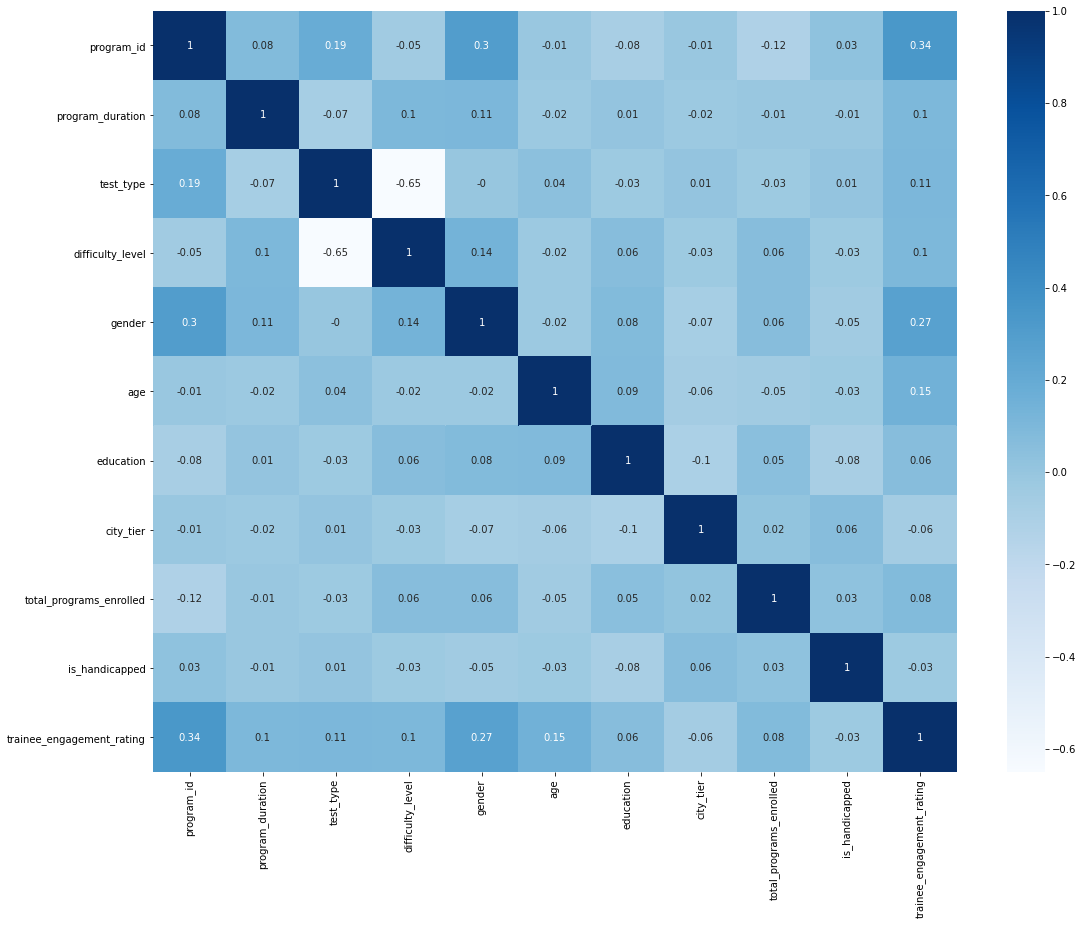

In [156]:
plt.figure(figsize=(18,14))
sns.heatmap(round(x.corr(),2), cmap='Blues', annot=True)
plt.show()

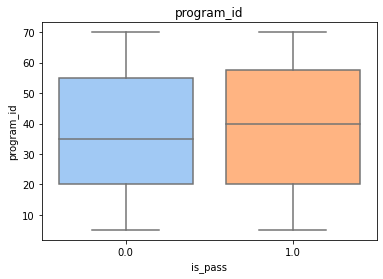

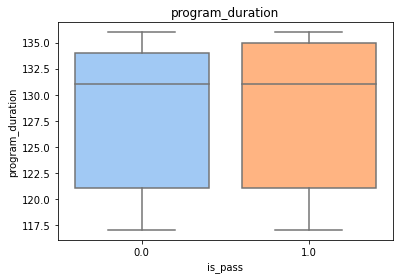

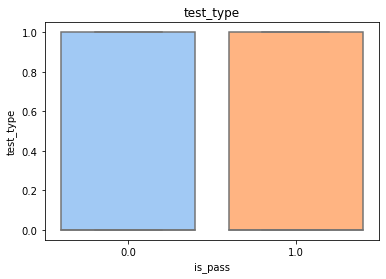

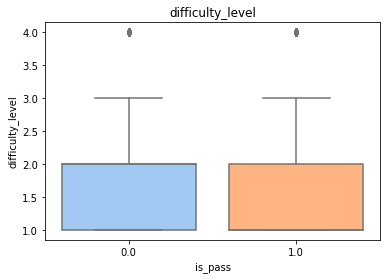

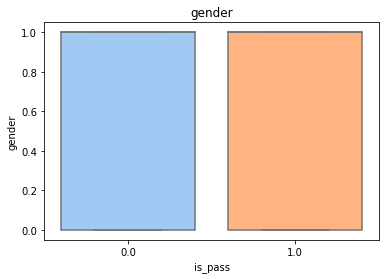

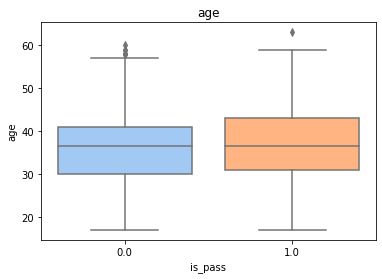

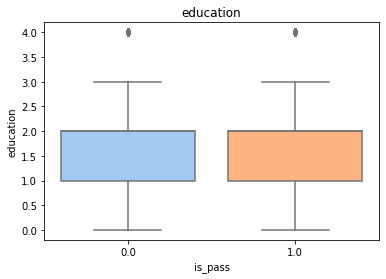

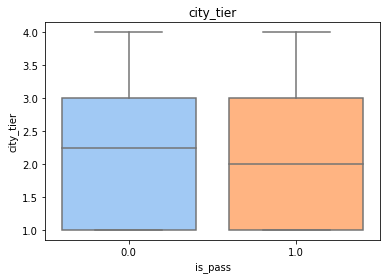

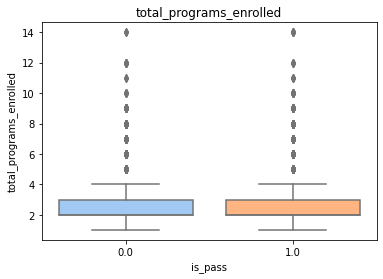

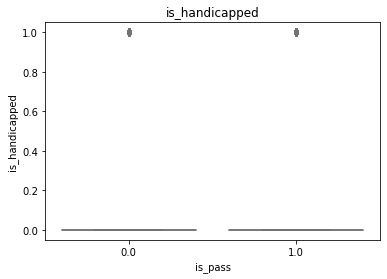

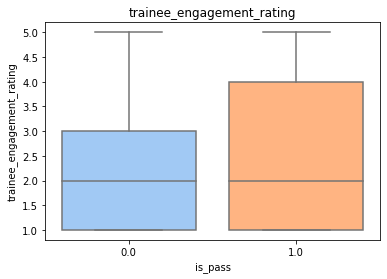

In [157]:
for col in train_base[predictors].columns:
        sns.boxplot(x='is_pass', y=col, saturation=1, palette='pastel', data=train_base)
        plt.title(col)
        plt.show()

观察箱形图可知”trainee_engagement_rating“这个学员参与度特征十分重要
参与度高的，通过率明显的高
“program_duration”计划持续天数这个特征相对来说也比较重要

In [158]:
# 如图，没啥冗杂的数据了

### 用线性回归模型进行训练，模拟

In [159]:
from sklearn.linear_model import LinearRegression # 导入线性回归的类，采用二分类进行分类预测
from sklearn.model_selection import KFold # K折交叉验证，取平均，调参
alg = LinearRegression() # 初始化线性回归类
predictions2 = []

kf = KFold(n_splits=3, random_state=1) # KFold类实例化

# 有3次for循环，每次建立一个回归模型
for train, test in kf.split(train_base):
    train_predictors = train_base[predictors].iloc[train,:] # 取出训练数据
    train_target = train_base["is_pass"].iloc[train] # 获取到数据集中交叉分类好的标签，即是否活了下来
    alg.fit(train_predictors, train_target) # 训练模型


test_predictions2 = alg.predict(test_base[predictors])
predictions2.append(test_predictions2)

E:\Anaconda_file\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


### 进行转化，转化为csv输出

In [160]:
predictions2 = np.concatenate(predictions2, axis=0) # 转换成数组，才能比较大小

# 使用线性回归得到的结果是在区间[0,1]上的某个值，需要将该值转换成0或1
predictions2[predictions2 > 0.500] = 1
predictions2[predictions2 <= 0.500] = 0

In [161]:
ID = test_base['id_num']
ID= np.array(ID)
c = np.vstack((ID,predictions2)).transpose()
columns = ['id_num', 'is_pass']
index=range(len(predictions2))
obj1 = pd.DataFrame(c,index,columns)

In [162]:
obj1

,id_num,is_pass
0,1442_124,1
1,12373_38,1
2,12035_21,1
3,11148_86,0
4,1362_131,1
...,...,...
11679,3882_161,1
11680,3426_38,1
11681,13063_142,1
11682,5667_82,1


### XGboost 算法

In [188]:
from xgboost import XGBClassifier

clf = XGBClassifier()
x_train = train_base[predictors]##训练数据
y_train= train_base["is_pass"] ##训练方向

clf.fit(x_train, y_train)##模拟
test_predict = clf.predict(test_base[predictors])


[23:04:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [189]:
ID = test_base['id_num']
ID= np.array(ID)
c = np.vstack((ID,test_predict)).transpose()
columns = ['id_num', 'is_pass']
index=range(11684)
obj2 = pd.DataFrame(c,index,columns)

In [165]:
obj2

,id_num,is_pass
0,1442_124,1
1,12373_38,1
2,12035_21,1
3,11148_86,0
4,1362_131,1
...,...,...
11679,3882_161,1
11680,3426_38,1
11681,13063_142,1
11682,5667_82,1


### 通过调整参数获得更好的效果

In [190]:
from sklearn.model_selection import GridSearchCV

## 定义参数取值范围
learning_rate = [0.1, 0.3, 0.6]
subsample = [0.8, 0.9]
colsample_bytree = [0.6, 0.8]
max_depth = [3,5,8]


parameters = { 'learning_rate': learning_rate,    ##学习率
              'subsample': subsample,   
              'colsample_bytree':colsample_bytree,
              'max_depth': max_depth}
model = XGBClassifier(n_estimators = 50)

## 进行网格搜索
clf = GridSearchCV(model, parameters, cv=3, scoring='accuracy',verbose=1,n_jobs=-1)
clf = clf.fit(x_train, y_train)


Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:   50.7s finished
E:\Anaconda_file\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:05:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [167]:
## 网格搜索后的最好参数为
clf.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 8,
 'subsample': 0.8}

In [191]:
clf = XGBClassifier(colsample_bytree = 0.8, learning_rate = 0.1, max_depth= 8, subsample = 0.8)

clf.fit(x_train, y_train)##模拟
test_predict = clf.predict(test_base[predictors])

ID = test_base['id_num']
ID= np.array(ID)
c = np.vstack((ID,test_predict)).transpose()
columns = ['id_num', 'is_pass']
index=range(11684)
obj3 = pd.DataFrame(c,index,columns)



[23:30:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


E:\Anaconda_file\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [169]:
obj3

,id_num,is_pass
0,1442_124,1
1,12373_38,1
2,12035_21,1
3,11148_86,0
4,1362_131,1
...,...,...
11679,3882_161,1
11680,3426_38,1
11681,13063_142,1
11682,5667_82,1


### LightGBM

In [192]:
from lightgbm.sklearn import LGBMClassifier

clf = LGBMClassifier()
clf.fit(x_train, y_train)

LGBMClassifier()

In [171]:
test_predict3 = clf.predict(test_base[predictors])

In [172]:
test_predict3[0:50]

array([1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [173]:
ID = test_base['id_num']
ID= np.array(ID)
c = np.vstack((ID,test_predict3)).transpose()
columns = ['id_num', 'is_pass']
index=range(11684)
obj4 = pd.DataFrame(c,index,columns)

In [174]:
obj4

,id_num,is_pass
0,1442_124,1
1,12373_38,1
2,12035_21,1
3,11148_86,0
4,1362_131,1
...,...,...
11679,3882_161,1
11680,3426_38,1
11681,13063_142,1
11682,5667_82,1


### 重新调参

In [175]:
## 从sklearn库中导入网格调参函数
from sklearn.model_selection import GridSearchCV
## 定义参数取值范围
learning_rate = [0.1,0.3,0.6]
feature_fraction = [0.5,0.6, 0.8,1]
num_leaves = [16, 32, 64]
max_depth = [-1,2,5,8]

parameters = { 'learning_rate': learning_rate,
              'feature_fraction':feature_fraction,
              'num_leaves': num_leaves,
              'max_depth': max_depth}
model = LGBMClassifier(n_estimators = 50)

## 进行网格搜索
clf = GridSearchCV(model, parameters, cv=3, scoring='accuracy',verbose=3, n_jobs=-1)
clf = clf.fit(x_train, y_train)

Fitting 3 folds for each of 420 candidates, totalling 1260 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:   37.6s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   58.3s
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1260 out of 1260 | elapsed:  1.5min finished


[LightGBM] [Warning] feature_fraction is set=0.6, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6


In [176]:
## 网格搜索后的最好参数为
clf.best_params_

{'feature_fraction': 0.6,
 'learning_rate': 0.1,
 'max_depth': -1,
 'num_leaves': 32}

In [178]:
## 定义带参数的 LightGBM模型 
clf = LGBMClassifier(feature_fraction =0.6,
                    learning_rate = 0.1,
                    max_depth= -1,
                    num_leaves = 32)

In [179]:
clf = clf.fit(x_train, y_train)##重新训练

In [180]:
test_predict4 = clf.predict(test_base[predictors])

In [181]:
ID = test_base['id_num']
ID= np.array(ID)
c = np.vstack((ID,test_predict4)).transpose()
columns = ['id_num', 'is_pass']
index=range(len(test_predict4))
obj5 = pd.DataFrame(c,index,columns)

### KNN算法

In [182]:
from sklearn import neighbors

In [183]:
from sklearn.neighbors import KNeighborsClassifier

x_train = (train_base[predictors].iloc[train,:])##训练数据
y_train= train_base["is_pass"].iloc[train] ##训练方向

knn = KNeighborsClassifier(200)
knn.fit(x_train,y_train)

obj6=knn.predict(test_base[predictors])

In [184]:
obj6[0:50]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [185]:
ID = test_base['id_num']
ID= np.array(ID)
c = np.vstack((ID,obj6)).transpose()
columns = ['id_num', 'is_pass']
index=range(11684)
obj6 = pd.DataFrame(c,index,columns)

### 导出数据，上榜输出

In [186]:
obj1.to_csv("secult_XXHG.csv",index=False,mode='a')
obj2.to_csv("secult_XGboost_low.csv",index=False,mode='a')
obj3.to_csv("secult_XHboost_high.csv",index=False,mode='a')
obj4.to_csv("secult_LightGBM_low.csv",index=False,mode='a')
obj5.to_csv("secult_LightGBM_high.csv",index=False,mode='a')
obj6.to_csv('secult_KNN.csv', index=False,mode='a')